<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:22px;font-style:sans-serif;">Churn Modelling</span> 

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">Aim of this notebook is to find the most accurate and precise model to predict, which clients (test data) will stay and which are hesitant and might plan to leave the company. We are using dataset of bank clients (10000 rows) with attributes specified below. Let's jump right into it!</span> 

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">**Dataset has following attributes:**</span> 


* Rownumber: Unique ID for every row
* CustomerID: Unique ID for every client
* Surname: Client's surname
* CreditScore: Client's credit score
* Geography: Country of client's origin
* Gender: Client's gender
* Age: Client's age
* Tenure: Number of years for which the client has been with the bank
* Balance: Client's balance on account
* NumOfProducts: Number of client's products
* HasCrCard: Flag whether client has credit card or not 
* IsActiveMember: Flag whether client is active member of bank or not 
* EstimatedSalary: Client's annual estimated salary in euros
* **Exited: Target variable, flag, whether client left the bank or not**

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Data Preprocessing</span>

In [8]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report

Data: https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [14]:
# Load dataset from kaggle "churn-modelling" dataset

df = pd.read_csv('Churn_Modelling.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Shape of data

df.shape

(10000, 13)

In [16]:
# Numeric description about all columns 

df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [17]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
# Columns: "CustomerId", "Surname" dropped because there is no such stron connection with Target column

df.drop(["CustomerId", "Surname"], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
# Encoding categorical columns into numeric

data = pd.get_dummies(df)
data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
4841,411,35,2,0.00,2,1,1,93825.78,0,1,0,0,1,0
3342,718,29,3,0.00,1,0,1,134462.29,0,1,0,0,1,0
3212,686,27,1,115095.88,2,0,0,78622.46,0,0,1,0,1,0
2495,666,46,5,123873.19,1,1,1,177844.06,0,1,0,0,0,1
2761,557,68,2,100194.44,1,1,1,38596.34,0,0,1,0,0,1


In [22]:
# Here is i made function which shows proportion of input column categories with target column categories

def proportion_stat(column):
    plt.figure(figsize = (10,5))
    
    DATA_GROUPED = df.groupby(column)['Exited']
    DF_SER = DATA_GROUPED.value_counts()
    DF = DF_SER.unstack()
    DF = DF.reset_index()
    DF.index.name = ''
    DF.columns.name = ''
    DF.columns = ['Item', 'Not Exited', 'Exited']

    DF_INFO = DF.copy()
    DF_INFO['Overall'] = DF_INFO['Not Exited'] + DF_INFO['Exited']
    DF_INFO['(%) Not Exited'] = np.round(DF_INFO['Not Exited'] / DF_INFO['Overall'] * 100)
    DF_INFO['(%) Exited'] = 100 - DF_INFO['(%) Not Exited']
    DF_INFO = DF_INFO[['Item', 'Not Exited', '(%) Not Exited', 'Exited', '(%) Exited', 'Overall']]

    DF_MELTED = DF.melt(id_vars='Item', var_name='Status', value_name='Count')

    figure = sns.barplot(x='Item', y='Count', hue='Status', data=DF_MELTED, palette = 'Blues')

    plt.title(f'Distribution of Not Exited and Exited clients by {column}', fontdict={'fontsize' : 14})
    plt.xlabel(column, fontdict={'fontsize' : 12})
    plt.ylabel("Count", fontdict={'fontsize' : 12})
    
    return DF_INFO, figure

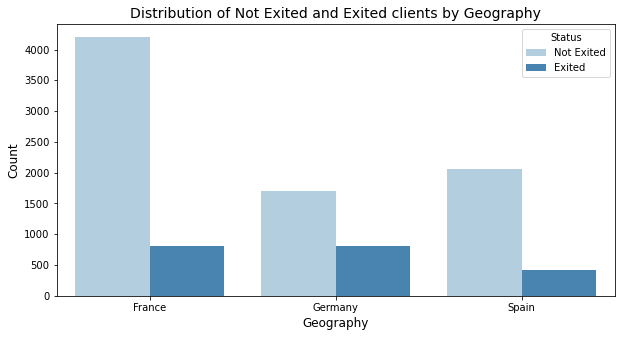

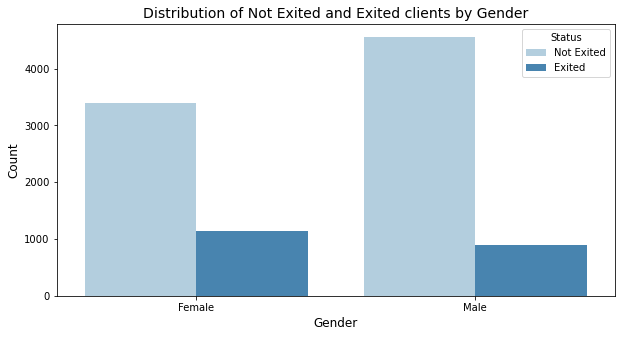

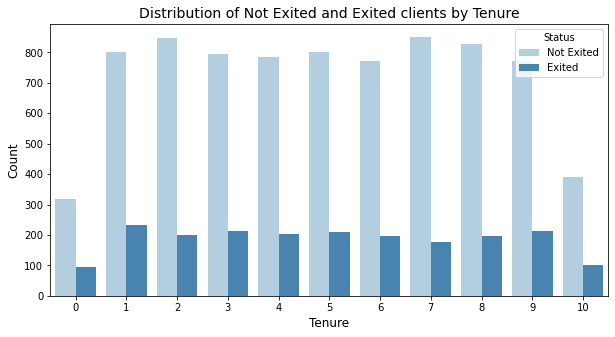

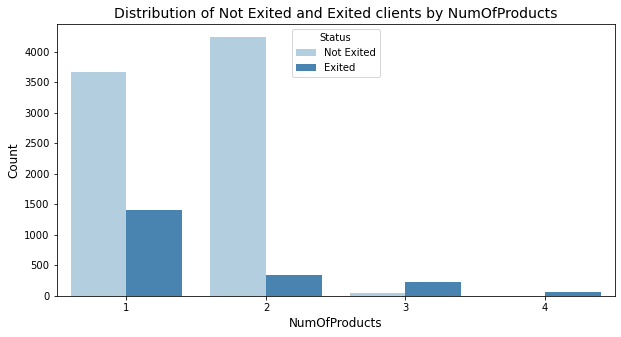

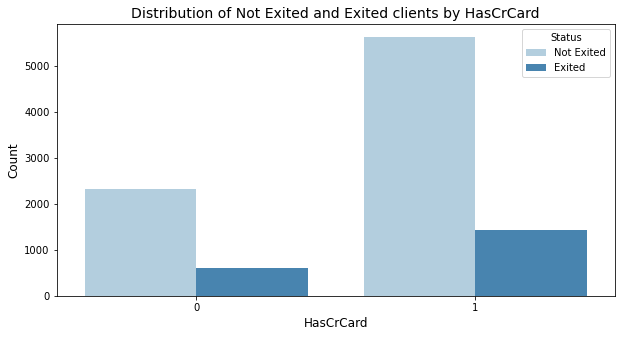

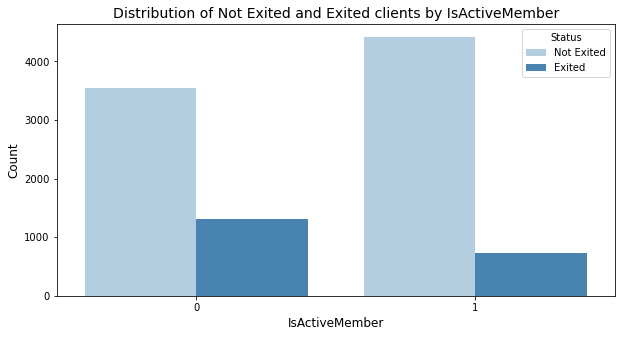

In [23]:
list_of_columns = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
for column in list_of_columns:
    proportion_stat(column)

<a id=section-two></a>
### <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">By this graphs we can understand a big problem, we have unbalanced target data.</span>

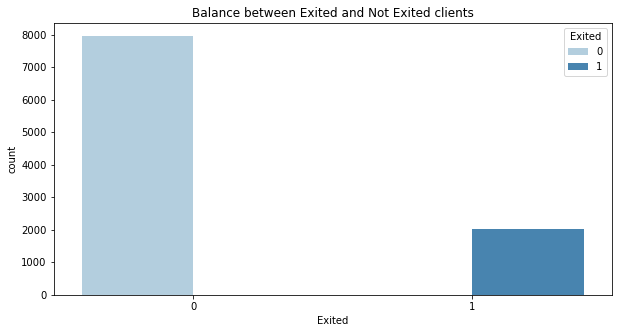

In [24]:
# Proportion of target categories

plt.figure(figsize=(10,5)) 
plt.title('Balance between Exited and Not Exited clients', fontsize=12)
ax = sns.countplot(data=data, x= 'Exited',hue='Exited', palette = 'Blues')

#for container in ax.containers:
#    ax.bar_label(container)
plt.show()

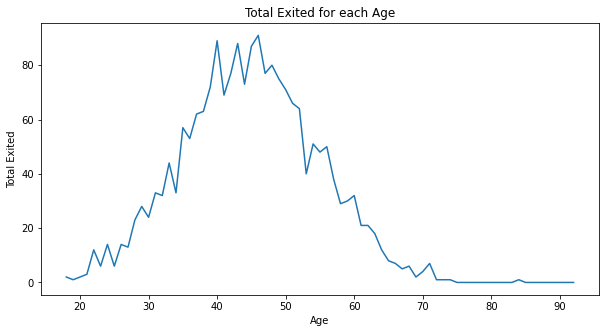

In [25]:
# Here is linegraph sum of Exited for each age 

plt.figure(figsize=(10,5)) 
plt.title('Total Exited for each Age', fontsize=12)

df_age = df.groupby('Age').sum('Exited')[['Exited']]
sns.lineplot(x = df_age.index, y = df_age.Exited)

plt.ylabel('Total Exited')

plt.show()

In [16]:
# Separate columns into input and output  

X_data = data.drop('Exited', axis=1)
y_data = data.Exited

In [17]:
# Spliting data into train and test datasets
# In order to hold proportion used stratify

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, stratify= y_data, random_state=73)

In [18]:
y_data.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [19]:
y_train.value_counts(normalize=True)

0    0.796333
1    0.203667
Name: Exited, dtype: float64

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Model implementation

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">RandomForestClassifier</span>

In [20]:
rfc = RandomForestClassifier()

# Define the hyperparameters and their respective ranges
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

random_search_rfc = RandomizedSearchCV(rfc, params, n_iter=50, cv=5, random_state=73)
random_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search_rfc.best_params_)

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'class_weight': None}


In [39]:
# Predict for test data

pred_rfc = random_search_rfc.predict(X_test)
rfc_score = random_search_rfc.score(X_test, y_test)

print(f'RandomForestClassifier: {rfc_score}')

RandomForestClassifier: 0.87


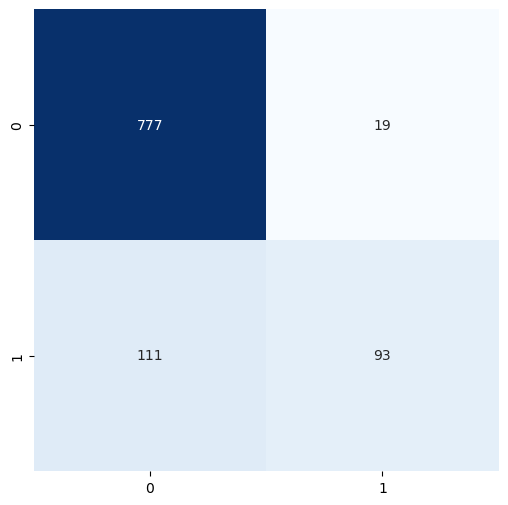

In [22]:
# Confusion matrix

plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_rfc), annot = True, fmt = '.0f', cbar = False, cmap="Blues")
plt.show()

In [23]:
# Classification report

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       796
           1       0.83      0.46      0.59       204

    accuracy                           0.87      1000
   macro avg       0.85      0.72      0.76      1000
weighted avg       0.87      0.87      0.85      1000



<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">GradientBoostingClassifier</span>

In [24]:
gbc = GradientBoostingClassifier()

# Define the hyperparameters and their respective ranges
param_dist = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5, 0.1],
              'min_samples_split': [2, 5, 10]}


random_search_gbc = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=50, cv=5, random_state=73)
random_search_gbc.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search_gbc.best_params_)

Best hyperparameters: {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.01}


In [38]:
# Predict for test data

pred_gbc = random_search_gbc.predict(X_test)
gbc_score = random_search_gbc.score(X_test, y_test)

print(f'GradientBoostingClassifier: {gbc_score}')

GradientBoostingClassifier: 0.876


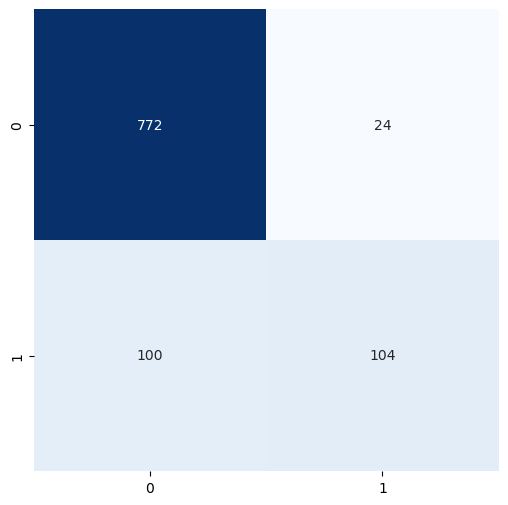

In [27]:
# Confusion matrix

plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot = True, fmt = '.0f', cbar = False, cmap="Blues")
plt.show()

In [28]:
# Classification report

print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       796
           1       0.81      0.51      0.63       204

    accuracy                           0.88      1000
   macro avg       0.85      0.74      0.78      1000
weighted avg       0.87      0.88      0.86      1000



<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">XGBClassifier</span>

In [29]:
xgb = XGBClassifier()

# Define the hyperparameters and their respective ranges
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.5, 1, 1.5, 2],
    'min_child_weight': [1, 3, 5],
    'objective': ['binary:logistic']
}

random_search_xgb = RandomizedSearchCV(xgb, params, n_iter=50, cv=5, random_state=73)
random_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search_xgb.best_params_)

Best hyperparameters: {'subsample': 1.0, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.5}


In [37]:
# Predict for test data

pred_gbc = random_search_xgb.predict(X_test)
xgb_score = random_search_xgb.score(X_test, y_test)

print(f'XGBClassifier score: {xgb_score}')

XGBClassifier score: 0.872


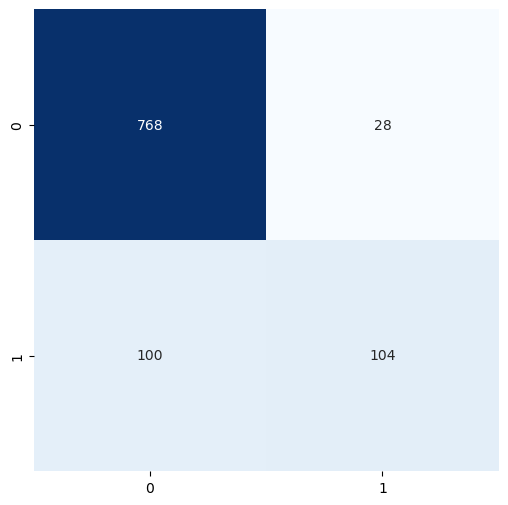

In [34]:
# Confusion matrix

plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot = True, fmt = '.0f', cbar = False, cmap="Blues")
plt.show()

In [32]:
# Classification report

print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.79      0.51      0.62       204

    accuracy                           0.87      1000
   macro avg       0.84      0.74      0.77      1000
weighted avg       0.87      0.87      0.86      1000



In [58]:
# Conclusion table

conclusion_df = pd.DataFrame(columns = ['For Train', 'For Test'])
conclusion_df['For Train'] = [random_search_rfc.score(X_train, y_train).round(3),
                              random_search_gbc.score(X_train, y_train).round(3),
                              random_search_xgb.score(X_train, y_train).round(3)]

conclusion_df['For Test'] = [rfc_score, gbc_score, xgb_score]
conclusion_df.index = ['rfc', 'gbc', 'xgb']

conclusion_df

,For Train,For Test
rfc,0.889,0.870
gbc,0.897,0.876
xgb,0.901,0.872


<a id=section-two></a>
<span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">In conclusion i can say we have low accuracy for 'Exited' sigment (f1-score 63% in gbc). It it connected with unbalanced and insufficient data. To increase accuracy of prediction of 'Exited' clinets we need more data. I get 87.6% of accuracy. In general, I think this is not a bad result</span>
